In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

In [65]:
# import os
#
# # 指定文件夹路径
# folder_path = 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation'  # 替换为实际的文件夹路径
#
# # 遍历文件夹中的所有文件
# for filename in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, filename)
#     try:
#         # 删除文件
#         if os.path.isfile(file_path):
#             os.remove(file_path)
#             print(f'Successfully deleted file: {file_path}')
#         # 删除文件夹
#         elif os.path.isdir(file_path):
#             os.rmdir(file_path)
#             print(f'Successfully deleted folder: {file_path}')
#     except Exception as e:
#         print(f'Error deleting file/folder: {file_path}, {e}')


In [66]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata/slice_data')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata\slice_data")
for file_name in file_list:
     data = pd.read_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata\slice_data",file_name), header=1)
     # concate each row
     data = data.iloc[:, :].values.reshape(-1).T
     data = pd.DataFrame(data)
     data.to_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape",file_name), index=False)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG\eegdata\slice_data


KeyboardInterrupt: 

In [ ]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/reshape')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape")
for file_name in file_list:
    print(file_name)
    data = pd.read_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape",file_name))
    print(data.shape)
os.chdir(saved_path)

In [ ]:
import sys
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\reshape')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\train')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\validation')
sys.path

In [ ]:
a = np.random.rand(3,3)
print(a)
a = pd.DataFrame(a)
a = a.iloc[:, :].values.reshape(-1)
print(a)

In [ ]:
import os
import random
import pandas as pd
import random
import shutil
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/reshape')
# 设置训练集和验证集的比例
train_ratio = 0.8
valid_ratio = 0.2

# 定义CSV文件所在的目录和训练集、验证集的目录
csv_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\reshape'
train_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\train'
valid_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\validation'

num_files = len([f for f in os.listdir(csv_dir) if os.path.isfile(os.path.join(csv_dir, f))])
# 获取所有的CSV文件
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

    # 计算训练集和验证集的数据量
train_size = int(train_ratio * num_files)
valid_size = int(valid_ratio * num_files)


# 随机抽取文件并将其复制到训练集或验证集中
for file in file_list:
    if random.uniform(0, 1) < train_ratio and train_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(train_dir, file))
        train_size -= 1
    elif valid_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(valid_dir, file))
        valid_size -= 1
    else:
        break

print(train_size)
print(valid_size)

In [67]:
train_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/train')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\train")
for train_file_name in train_file_list:
    print(train_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG\eegdata\slice_data
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_11.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_13.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_14.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_5.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_6.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_7.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_0.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_1.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.

In [68]:
train_labels = []
for train_file_name in train_file_list:
    train_labels.append(train_file_name.split('_')[0])

print(train_labels)
print(train_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[train_label] for train_label in train_labels]

train_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest',

In [69]:
valid_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\validation")
for valid_file_name in valid_file_list:
    print(valid_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG\eegdata\slice_data
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_10.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_12.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_8.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_9.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_8.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_9.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_0.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_1.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_3.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_9.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_0.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_11.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_12.csv
read_bke_02_epo

In [93]:
os.chdir(saved_path)
valid_labels = []
for valid_file_name in valid_file_list:
    valid_labels.append(valid_file_name.split('_')[0])

print(valid_labels)
print(valid_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4, 'walkfocus': 5}

encode_labels = [label_map[valid_label] for valid_label in valid_labels]

valid_label = torch.tensor(encode_labels, dtype=torch.int64)
print(valid_label)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus'

In [71]:
class EEGDataset(Dataset):
    def __init__(self, filelist, root_dir,data_label,transform=None):
        self.filelist = filelist
        self.root_dir = root_dir
        self.data_label = data_label
        self.transform = transform


    def __len__(self):
        return len(self.filelist)

    def __getitem__(self, index):
        #print('index:', index, 'len(self.filelist):', len(self.filelist), 'len(self.data_label):', len(self.data_label))
        data_label = self.data_label[index]
        file_path = os.path.join(self.root_dir, self.filelist[index])
        eeg_data = np.array(pd.read_csv(file_path)).T
        return eeg_data, data_label

In [72]:
train_unique_objects = set(train_labels)
train_class_number = len(train_unique_objects)
print(train_class_number)

valid_unique_objects = set(valid_labels)
valid_class_number = len(valid_unique_objects)
print(valid_class_number)

6
6


In [73]:
train_dataset = EEGDataset(train_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/train', train_label)
valid_dataset = EEGDataset(valid_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation', valid_label)

In [74]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [75]:
# train_object, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_object.size()}")
# print(f"Labels batch shape: {train_object.size()}")
# img = train_object[0].squeeze()
# label = train_labels[0]
# plt.imshow(img)
# plt.show()
# print(f"Label: {label}")

In [76]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [77]:
time_step = 1000
sample_rate = 128

In [78]:
class EEG_RNN_Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(EEG_RNN_Net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # 初始化隐藏层
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出，作为最终输出
        return out

In [85]:
model = EEG_RNN_Net(input_size=31000, hidden_size=128, output_size=10, num_layers=4).to(device)
print(model)

EEG_RNN_Net(
  (rnn): RNN(31000, 128, num_layers=4, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


In [86]:
X = torch.rand(1, 1, 31000, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


In [87]:
learning_rate = 0.0001
batch_size = 64
num_epochs = 300
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [88]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            global train_loss
            train_loss.append(loss)
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    global valid_loss
    valid_loss.append(test_loss)
    global accuracy
    accuracy.append(correct)

In [89]:
# torch.cuda.empty_cache()
# model = EEG_RNN_Net(input_size=31000, hidden_size=128, output_size=10, num_layers=2).to(device)

In [90]:
train_loss = []
valid_loss = []
accuracy = []
for t in range(num_epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.train(True)
    train(train_loader, model, loss_fn, optimizer)
    model.train(False)
    test(valid_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.285085  [    0/  508]
Test Error:
 Accuracy: 20.8%, Avg loss: 2.234359 

Epoch 2
-------------------------------
loss: 2.184120  [    0/  508]
Test Error:
 Accuracy: 28.5%, Avg loss: 2.186313 

Epoch 3
-------------------------------
loss: 2.145238  [    0/  508]
Test Error:
 Accuracy: 38.9%, Avg loss: 2.109978 

Epoch 4
-------------------------------
loss: 2.147763  [    0/  508]
Test Error:
 Accuracy: 47.9%, Avg loss: 2.079142 

Epoch 5
-------------------------------
loss: 2.029292  [    0/  508]
Test Error:
 Accuracy: 50.7%, Avg loss: 2.013354 

Epoch 6
-------------------------------
loss: 1.988887  [    0/  508]
Test Error:
 Accuracy: 52.8%, Avg loss: 1.970427 

Epoch 7
-------------------------------
loss: 1.979308  [    0/  508]
Test Error:
 Accuracy: 51.4%, Avg loss: 1.881794 

Epoch 8
-------------------------------
loss: 1.916834  [    0/  508]
Test Error:
 Accuracy: 52.8%, Avg loss: 1.886158 

Epoch 9
------------------------

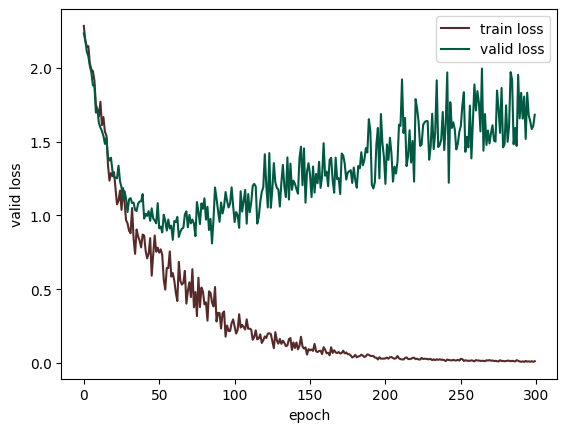

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
hex_d1 = '#552a28'
hex_d2 = '#005943'

plt.figure()
plt.plot(train_loss,hex_d1,label='train loss')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.plot(valid_loss,hex_d2,label='valid loss')
plt.ylabel('valid loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig('rnn_1000_100e_loss_1.png')
plt.show()

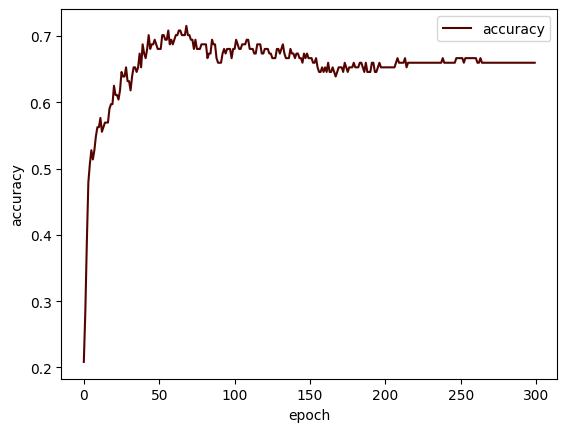

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(accuracy, color = '#550300', label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.savefig('rnn_1000_100e_accuracy_1.png')
plt.show()